# Data Cleaning With Pandas

In [233]:
import pandas as pd
import numpy as np

## Read Data

In [234]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [235]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


### Features Data Descriptions

**Features Descriptions**
1. ST_NUM: Street Number (float or int)
2. ST_NAME : Street Name (string)
3. OWN_OCCUPIED : Is the residence owner occupied (string Y or N)
4. NUM_BEDROOMS: Number of bedrooms (float or int)

## Standard Missing Values
**Definition** <br>
Missing value yang bisa dikenali Pandas. Null values akan diganti dengan NaN

In [236]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [237]:
df['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [238]:
# mengetahui nilai kosong dari suatu atribut
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

## Non Standard Missing Values
**definition** <br>
Missing value yang memiliki format berbeda sehingga Pandas tidak bisa mengenalinya. <br>
Contoh: <br>
1. n/a
2. --
3. NA
4. na

In [239]:
# example non standard missing values
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [240]:
# deteksi berbagai format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA"]
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_values)

In [241]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [242]:
df['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [243]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

## Unexpected Missing Values
**definition** <br>
Ketika tipe data dari suatu fitur tidak semestinya. Misalnya yang seharusnya float, malah ditemukan string atau sebaliknya

In [244]:
# example unexpected Missing Values
df['OWN_OCCUPIED']
"""
baris keempat berupa missing values karena nilai yang ada tidak seharusnya
"""

'\nbaris keempat berupa missing values karena nilai yang ada tidak seharusnya\n'

In [245]:
# Handling unexpeceted missing values untuk OWN_OCCUPIED
'''
1. looping seluruh baris
2. kalau bisa diubah ke int berarti tandai sebagai missing value, else pass
'''
count_index = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[count_index,'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    count_index+=1

In [246]:
# after
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [247]:

count_index = 0
for row in df['OWN_OCCUPIED']:
    try:
        float(row)
        df.loc[count_index,'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    count_index+=1

In [248]:
# after
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

## Summarizing missing values
Setelah membersihkan missing values maka kita bisa melihat summarynya

In [249]:
# Melihat jumlah total missing values untuk setiap features
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [250]:
# melihat total keseluruhan missing values
df.isnull().sum().sum()

12

In [251]:
# Memeriksa dengan cepat apakah dataframe kita ada missing value
df.isnull().values.any()

True

## Handling Missing Values

### Replacing with arbitrary numbers

In [252]:
df['ST_NUM'].fillna(125, inplace=True)

In [253]:
df['ST_NUM'].fillna(125)

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [254]:
# Imputasi berbasis lokasi (mengganti missing value pada label index 2 dengan 125 pada kolom ST_NUM)
df.loc[2,'ST_NUM'] = 125

In [255]:
# fill with median values
df['NUM_BEDROOMS'].fillna(df['NUM_BEDROOMS'].median(),inplace=True)

In [256]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


# Analyzing Obesity in England

## Installing Requirements

## Read dataset

In [257]:
obes_df = pd.ExcelFile('/Users/raraditapurnamareta/Documents/obes.xls')

In [258]:
# show all sheetname
obes_df.sheet_names 

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [259]:
data_age = obes_df.parse(u'7.2', skiprows=4, skipfooter=14)
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [260]:
# Mengganti nama kolom Unnamed:0
data_age.rename(
    columns={
        'Unnamed: 0':'Year'
    },
    inplace=True
)
# Menghapus baris kosong pada index ke-0 karena ditandai sebagai NaN (header excel)
data_age.dropna(inplace=True)

In [261]:
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


## Setting 'Year' as index data for plotting

In [262]:
data_age.set_index('Year', inplace=True)

In [263]:
%matplotlib inline

<AxesSubplot:xlabel='Year'>

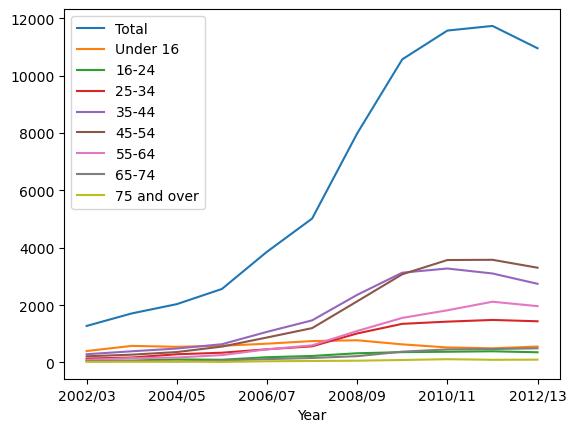

In [264]:
data_age.plot()

## Menghapus kolom 'Total'

In [265]:
data_age_minus_total = data_age.drop('Total',axis=1)

<AxesSubplot:xlabel='Year'>

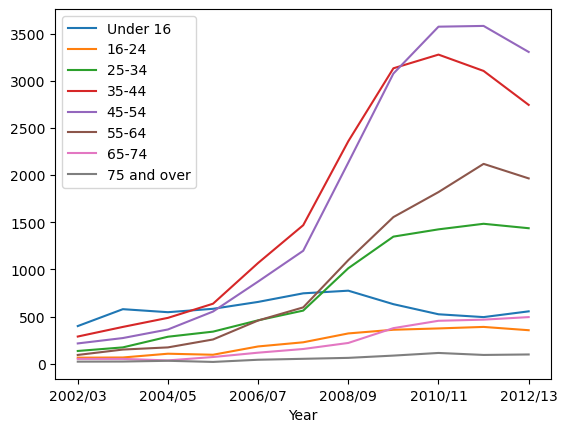

In [266]:
data_age_minus_total.plot()

## Plotting

<AxesSubplot:xlabel='Year'>

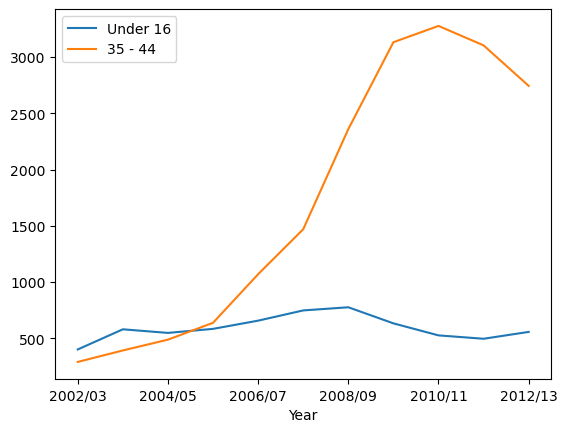

In [267]:
# Plot untuk melihat rentang usia anak-anak di bawah 16 tahun dan orang dewasa rentang 35 - 44 tahun
data_age['Under 16'].plot(label='Under 16', legend=True)
data_age['35-44'].plot(label='35 - 44', legend=True)

# Timeseries dataset

## Import library for generate date range

In [268]:
from datetime import datetime

## Generate Data

In [269]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [270]:
# buat dataframe dengan tambahan kolom 'Data' yang merupakan integer random
df_date_rng = pd.DataFrame(
    data=date_rng,
    columns=['Date']
)

In [271]:
df_date_rng['Data'] = np.random.randint(0,100, size=(len(df_date_rng),1))

## Mengganti index data dengan datetime

In [272]:
# buat atribut baru datetime
df_date_rng['datetime'] = pd.to_datetime(df_date_rng['Date'])
# replacing index
df_date_rng.set_index('datetime',inplace=True)
# drop atribut date
df_date_rng.drop(['Date'],axis=1,inplace=True)



In [273]:
df_date_rng.head()

,Data
datetime,
2020-01-01 00:00:00,21
2020-01-01 01:00:00,91
2020-01-01 02:00:00,60
2020-01-01 03:00:00,10
2020-01-01 04:00:00,39


## Berkutat dengan date 

In [274]:
# Bagaimana jika 'time' stamp dalam data sebenarnya adalah string? dan ingin diubah ke to_datetime?
example_string_date_range = [str(x) for x in date_rng]

In [275]:
# Mengubahnya ke datetime
timestamp_date_range = pd.to_datetime(example_string_date_range,infer_datetime_format=True)
timestamp_date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

### Mengubah format unique string

In [276]:
example_format_date_string = ['June-01-2020', 'June-02-2020','June-03-2020']
timestamp_date_range_2 = [
    datetime.strptime(x,'%B-%d-%Y') for x in example_format_date_string
]

In [277]:
# making new df
df_format_to_timestamp = pd.DataFrame(timestamp_date_range_2,columns=['date'])

In [278]:
df_format_to_timestamp

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


## Slicing

In [279]:
# Menampilkan seluruh data pada hari ==2
df_date_rng[df_date_rng.index.day==2]

,Data
datetime,
2020-01-02 00:00:00,10
2020-01-02 01:00:00,47
2020-01-02 02:00:00,9
2020-01-02 03:00:00,11
2020-01-02 04:00:00,65
2020-01-02 05:00:00,17
2020-01-02 06:00:00,77
2020-01-02 07:00:00,82
2020-01-02 08:00:00,27


In [280]:
# accesing via index
df_date_rng.loc['2020-01-03']

,Data
datetime,
2020-01-03 00:00:00,66
2020-01-03 01:00:00,64
2020-01-03 02:00:00,16
2020-01-03 03:00:00,26
2020-01-03 04:00:00,11
2020-01-03 05:00:00,72
2020-01-03 06:00:00,97
2020-01-03 07:00:00,31
2020-01-03 08:00:00,20


In [281]:
# getting data with range date
df_date_rng.loc['2020-01-04':'2020-01-06']

,Data
datetime,
2020-01-04 00:00:00,68
2020-01-04 01:00:00,24
2020-01-04 02:00:00,80
2020-01-04 03:00:00,48
2020-01-04 04:00:00,17
...,...
2020-01-06 19:00:00,69
2020-01-06 20:00:00,90
2020-01-06 21:00:00,36


## Descriptive Statistics

In [282]:
# Menghitung sum, mean, max untuk data dengan frekuensi harian dan bukan dihitung per jam
df_date_rng.resample('D').mean()

,Data
datetime,
2020-01-01,48.833333
2020-01-02,46.083333
2020-01-03,46.666667
2020-01-04,58.750000
2020-01-05,49.541667
2020-01-06,48.125000
2020-01-07,57.250000
2020-01-08,12.000000


## Rolling Windows

In [283]:
df_date_rng

,Data
datetime,
2020-01-01 00:00:00,21
2020-01-01 01:00:00,91
2020-01-01 02:00:00,60
2020-01-01 03:00:00,10
2020-01-01 04:00:00,39
...,...
2020-01-07 20:00:00,85
2020-01-07 21:00:00,30
2020-01-07 22:00:00,68


In [284]:
df_date_rng['rolling_sum'] = df_date_rng.rolling(3).sum()

In [285]:
df_date_rng.head()

,Data,rolling_sum
datetime,,
2020-01-01 00:00:00,21,NaN
2020-01-01 01:00:00,91,NaN
2020-01-01 02:00:00,60,172.0
2020-01-01 03:00:00,10,161.0
2020-01-01 04:00:00,39,109.0


In [286]:
df_date_rng['rolling_mean'] = df_date_rng['Data'].rolling(3).mean()
df_date_rng['rolling_sum_backfilled'] = df_date_rng['rolling_sum'].fillna(method='backfill')
df_date_rng.head()

,Data,rolling_sum,rolling_mean,rolling_sum_backfilled
datetime,,,,
2020-01-01 00:00:00,21,NaN,NaN,172.0
2020-01-01 01:00:00,91,NaN,NaN,172.0
2020-01-01 02:00:00,60,172.0,57.333333,172.0
2020-01-01 03:00:00,10,161.0,53.666667,161.0
2020-01-01 04:00:00,39,109.0,36.333333,109.0


# Real Time Series Dataset

## Import dataset

In [287]:
opsd_df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',index_col=0,parse_dates=True)

In [288]:
opsd_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


## Menambahkan atribut Year, Month, Weekday

In [289]:
opsd_df['Year'] = opsd_df.index.year
opsd_df['Month'] = opsd_df.index.month
opsd_df['Weekday'] = opsd_df.index.weekday

In [290]:
opsd_df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


## Plotting time series data

In [291]:
opsd_df.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'Weekday'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

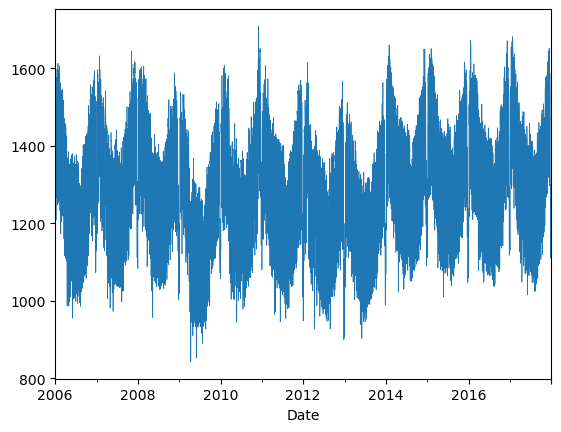

In [292]:
opsd_df['Consumption'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

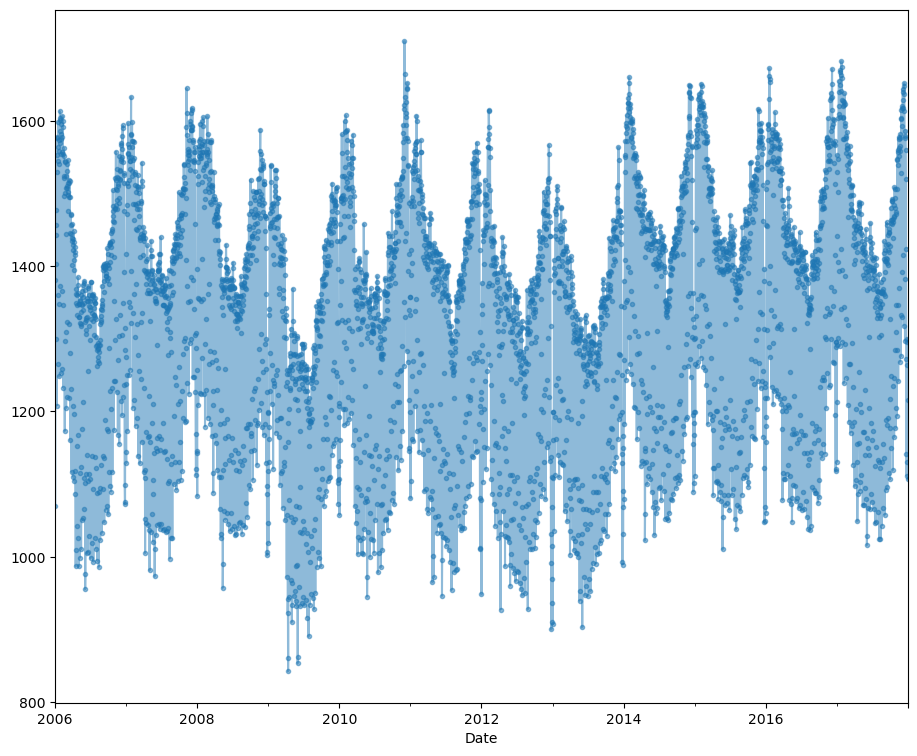

In [293]:
# Mengganti style plot dengan titik
opsd_df['Consumption'].plot(linestyle=None,marker='.',alpha=0.5,figsize=(11,9))

<AxesSubplot:xlabel='Date'>

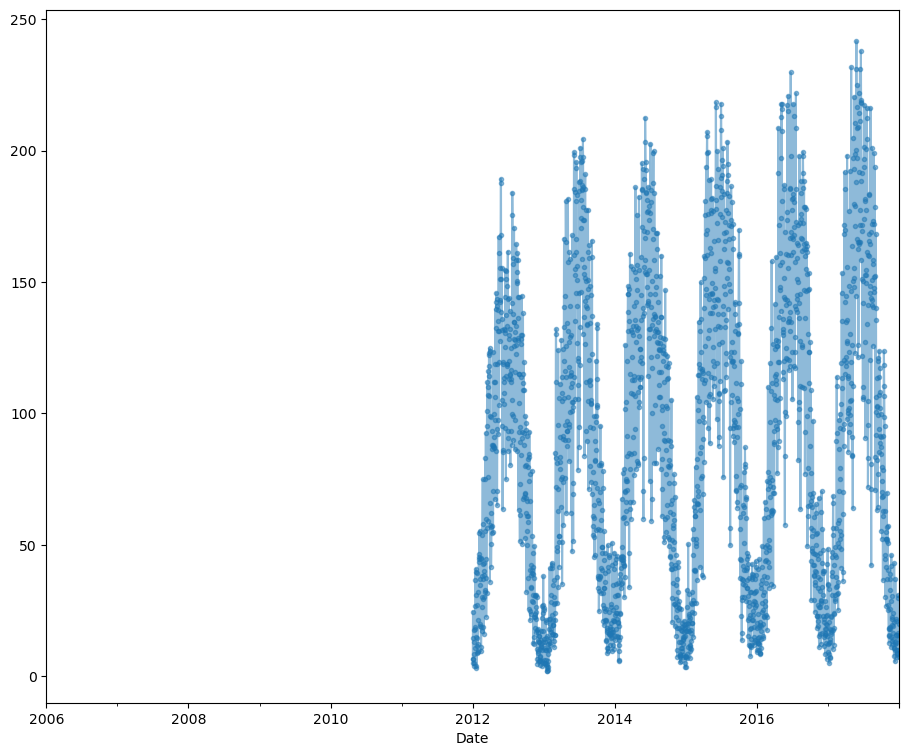

In [294]:
opsd_df['Solar'].plot(linestyle=None,marker='.',alpha=0.5,figsize=(11,9))

<AxesSubplot:xlabel='Date'>

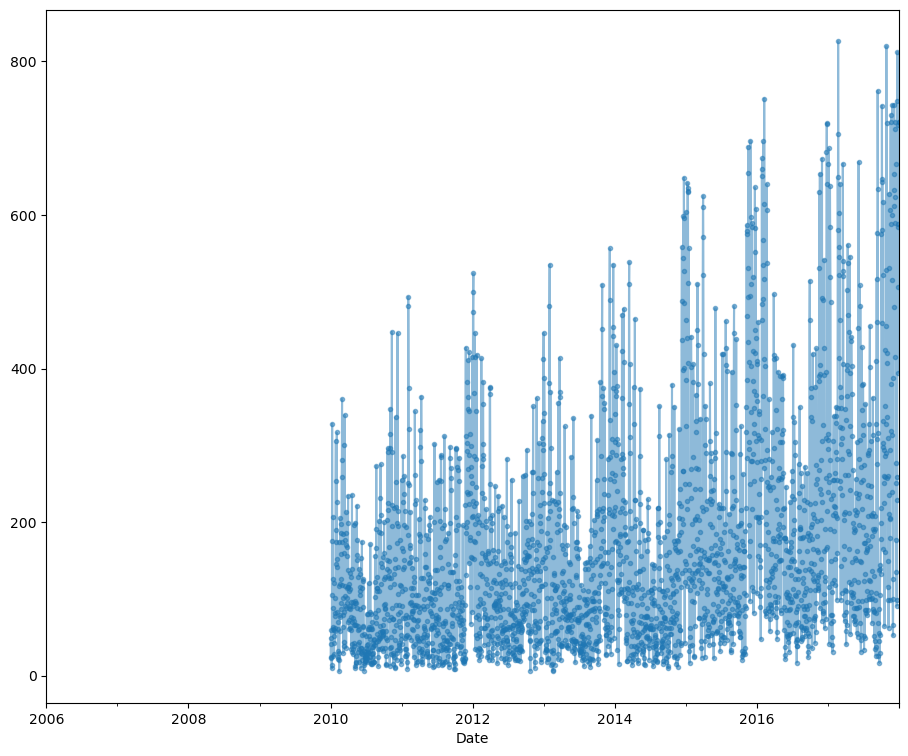

In [295]:
opsd_df['Wind'].plot(linestyle=None,marker='.',alpha=0.5,figsize=(11,9))

Text(0, 0.5, 'Daily Consumption (GWh)')

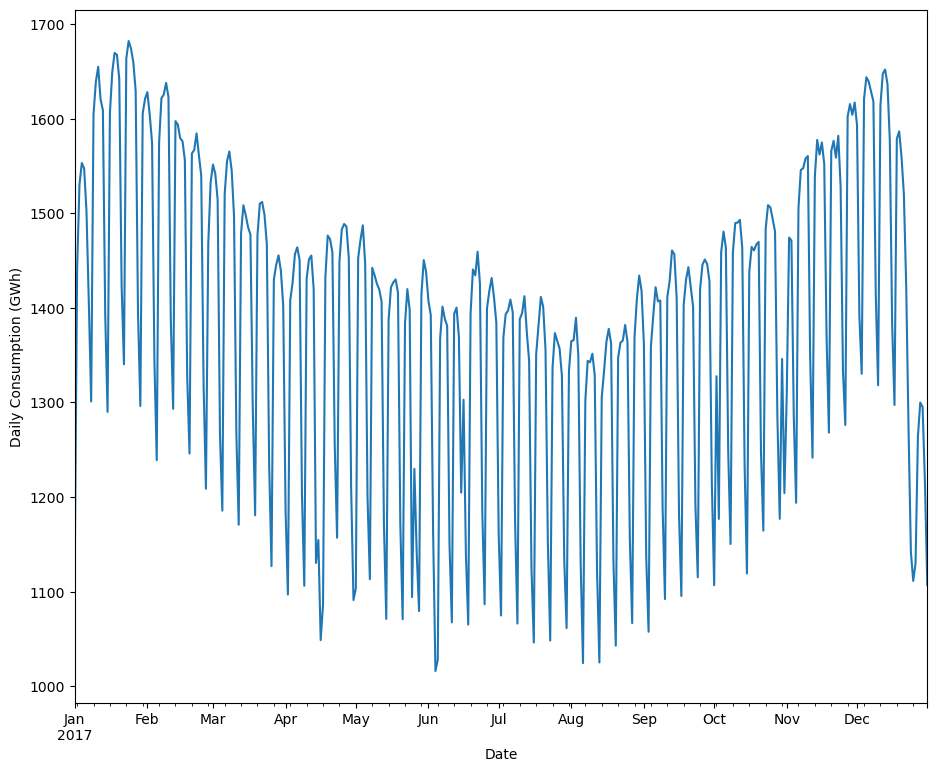

In [296]:
# Plotting Consumption pada tahun 2017 (Spesifik Plotting)
ax = opsd_df.loc['2017','Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

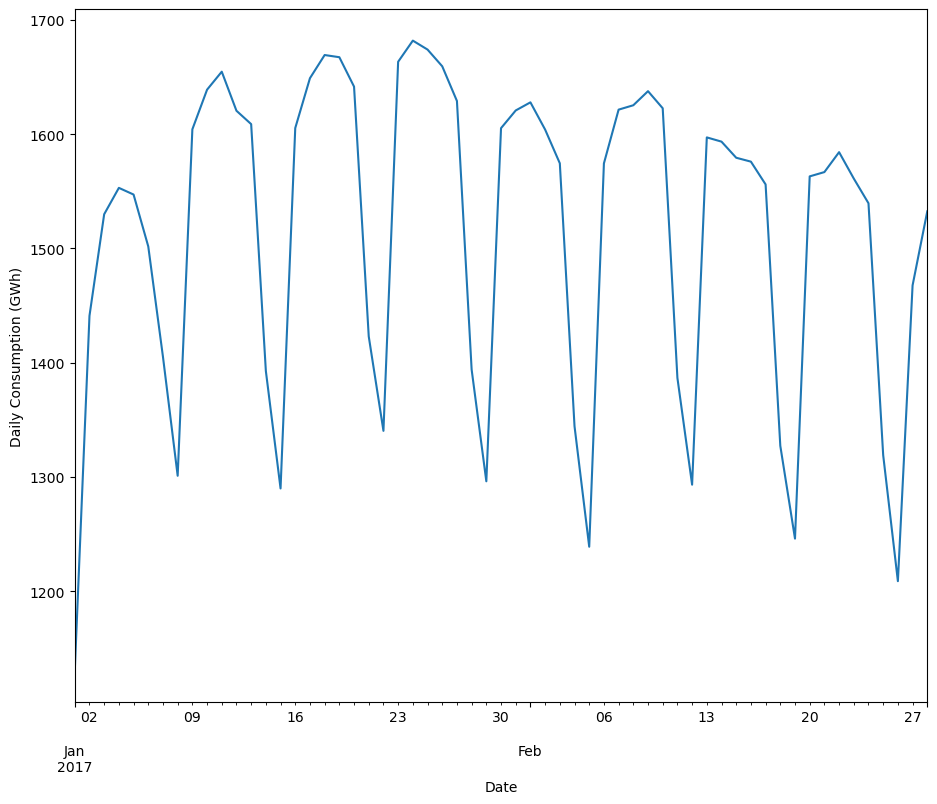

In [297]:
# Lebih spesifik dalam 1 bulan misalnya
ax = opsd_df.loc['2017-01' :"2017-02",'Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWh)')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

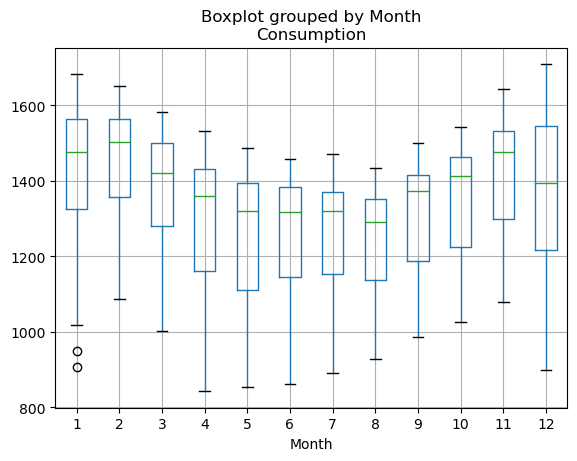

In [298]:
# Plotting dengan boxplot berdasarkan bulan
opsd_df.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

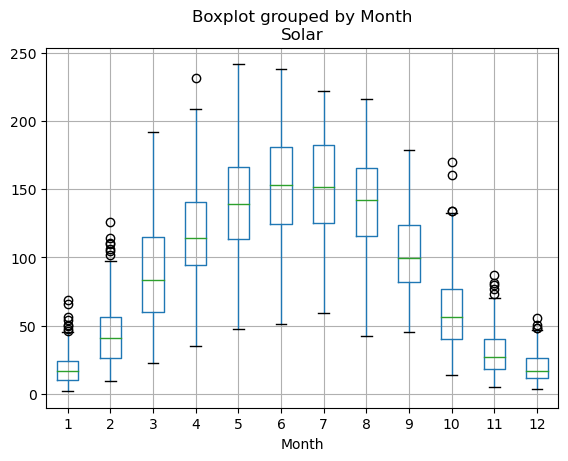

In [299]:
opsd_df.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Weekday'>

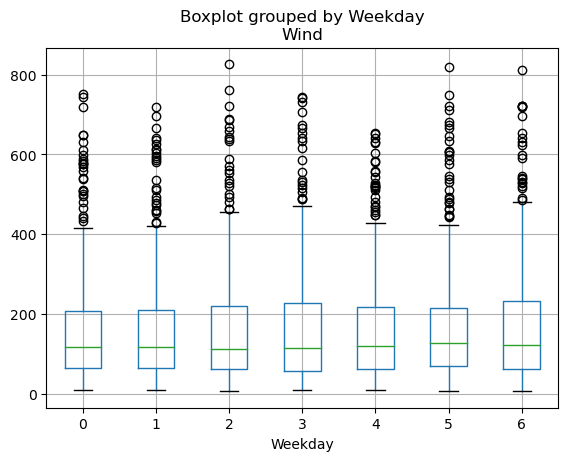

In [300]:
opsd_df.boxplot(column=['Wind'], by='Weekday')

## Resample data menjadi weekly mean time series

In [301]:
data_columns = ['Consumption','Wind','Solar', 'Wind+Solar']
opsd_df_weekly = opsd_df[data_columns].resample('W').mean()

<AxesSubplot:xlabel='Date'>

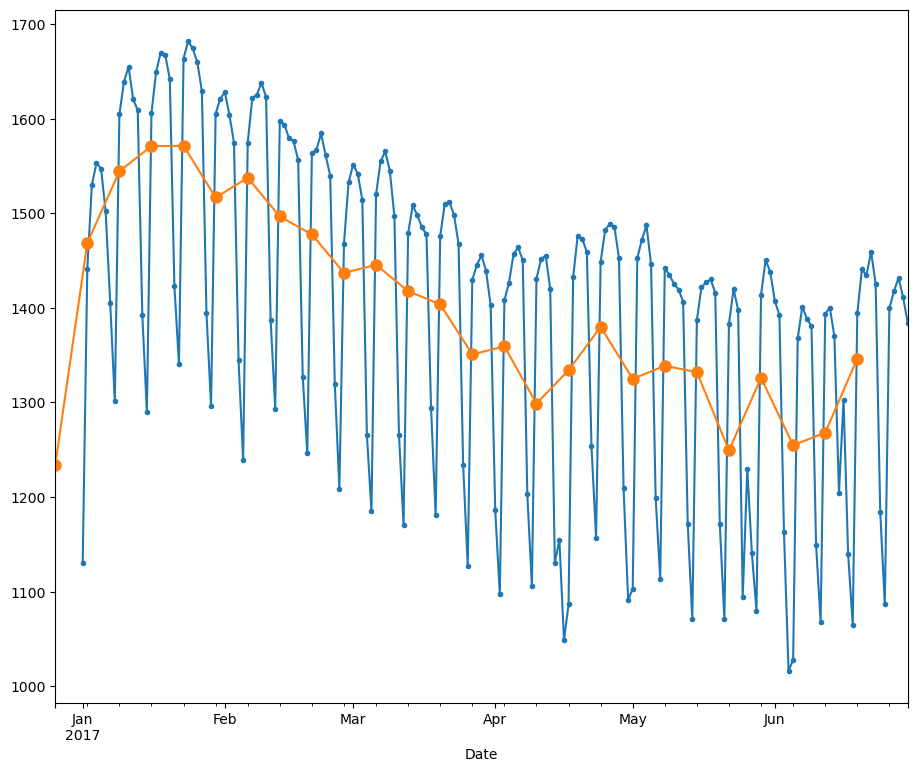

In [302]:
# Plotting perbandingan consumption harian dan mingguan
start, end = '2017-01', '2017-06'

opsd_df.loc[start:end,'Consumption'].plot(marker='.', linestyle='-', figsize=(11,9))
opsd_df_weekly.loc[start:end,'Consumption'].plot(marker='o', linestyle='-',markersize=8, figsize=(11,9))


<AxesSubplot:xlabel='Date'>

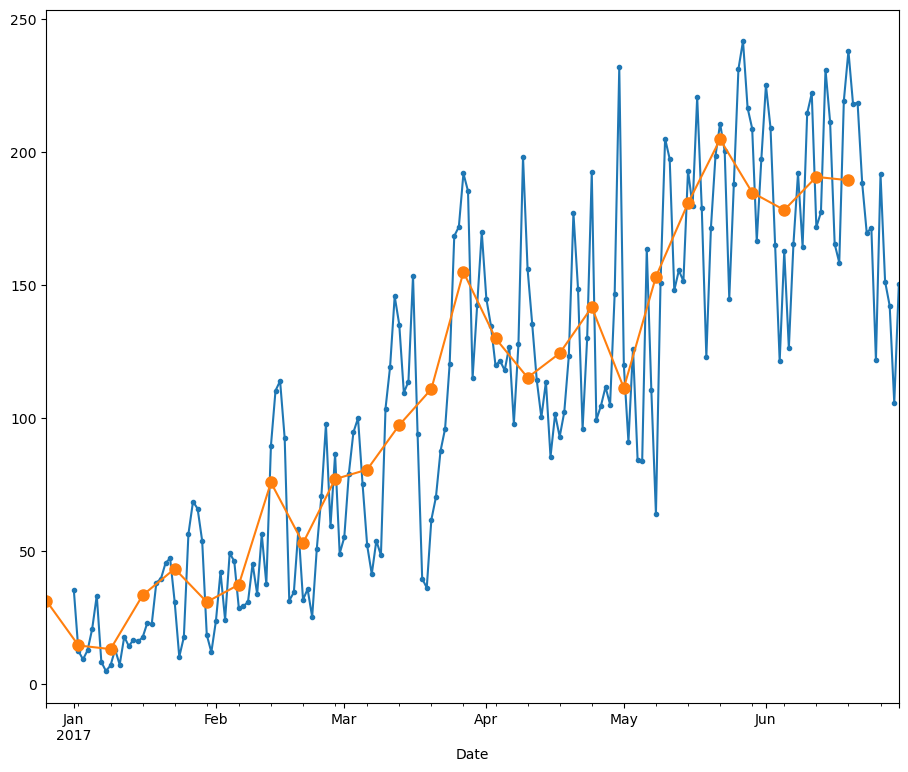

In [303]:
opsd_df.loc[start:end,'Solar'].plot(marker='.', linestyle='-', figsize=(11,9))
opsd_df_weekly.loc[start:end,'Solar'].plot(marker='o', linestyle='-',markersize=8, figsize=(11,9))